# Символьное и численное решение нелинейного уравнения
$$ arctg x = x (1-\varepsilon^2) $$

In [31]:
using SymPy
using Roots

In [2]:
epsilon = 0.1
K = 7
e = Sym("varepsilon")
x = sum([symbols("c_$i",real=true)*e^i for i=2:K])
x += symbols("c_1",positive=true)*e

                             2                3                4              
c₁⋅varepsilon + c₂⋅varepsilon  + c₃⋅varepsilon  + c₄⋅varepsilon  + c₅⋅varepsil

  5                6                7
on  + c₆⋅varepsilon  + c₇⋅varepsilon 

In [3]:
y = Sym("y")
taylor_s = series(atan(y), y, 0, 6)

     3    5        
    y    y     ⎛ 6⎞
y - ── + ── + O⎝y ⎠
    3    5         

In [4]:
eq = sum(as_ordered_terms(taylor_s)[1:end-1])(y=>x) - x*(1-e^2);
#eq[:expand]()[:collect](e)

In [5]:
x_coeffs = filter(i->i!=Sym(0),coeffs(eq[:expand](),e))[1:K]

7-element Array{Sym,1}:
                                                                                                                                                                  -c_1^3/3 + c_1
                                                                                                                                                                -c_1^2*c_2 + c_2
                                                                                                                                           c_1^5/5 - c_1^2*c_3 - c_1*c_2^2 + c_3
                                                                                                                           c_1^4*c_2 - c_1^2*c_4 - 2*c_1*c_2*c_3 - c_2^3/3 + c_4
                                                                                             c_1^4*c_3 + 2*c_1^3*c_2^2 - c_1^2*c_5 - 2*c_1*c_2*c_4 - c_1*c_3^2 - c_2^2*c_3 + c_5
                                                           c_1^4*c_4 + 4*c_1^3*c_2*c_3 + 2*

In [6]:
solve(x_coeffs)

1-element Array{Dict{Sym,Sym},1}:
 Dict(c_2=>0,c_5=>567*sqrt(3)/200,c_4=>0,c_6=>0,c_7=>24057*sqrt(3)/2000,c_3=>9*sqrt(3)/10,c_1=>sqrt(3))

In [7]:
root = x(solve(x_coeffs)[1])

                   7                    5                  3                
24057⋅√3⋅varepsilon    567⋅√3⋅varepsilon    9⋅√3⋅varepsilon                 
──────────────────── + ────────────────── + ──────────────── + √3⋅varepsilon
        2000                  200                  10                       

In [8]:
N(root(e=>epsilon))

0.1748151135214082

### численное решение:

In [9]:
using Roots
find_zero(i->atan(i)-i*(1-epsilon^2), 3^0.5*epsilon-0.01, verbose=true)

Results of univariate zero finding:

* Converged to: 0.1747797849831364
* Algorithm: Roots.Secant(), with possible bracketing with Roots.AlefeldPotraShi()
* iterations: 2
* function evaluations: 10
* Note: Exact zero found. Bracketing used over (0.16320508075688772, 0.1761074991086977), those steps not shown. 

Trace:
x_0 =  0.1632050807568877,	 fx_0 =  0.0002057390223837



0.1747797849831364

In [10]:
X = [1e-2, 1e-4, 1e-6]
vals = [N(root(e=>X[i])) for i=1:3]

3-element Array{Float64,1}:
 0.01732206741266033   
 0.00017320508231573353
 1.732050807570436e-6  

In [11]:
num_vals = [find_zero(i->atan(i)-i*(1-X[k]^2), 3^0.5*epsilon-0.01) for k=1:3]

3-element Array{Float64,1}:
 0.017322067078503655  
 0.00017323687049688639
 1.378339838995256e-5  

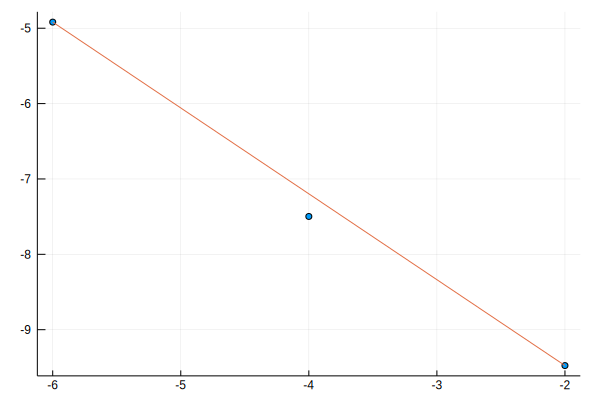

In [30]:
using Plots
Y = abs.(num_vals - vals)
scatter(log.(10,X),log.(10,Y),legend=false,ms=3)
plot!(log.(10,[X[1],X[3]]),log.(10,[Y[1],Y[3]]))

## Метод гомотопии
$$ arctg x = x (1-\varepsilon_0^2), $$
$$ \varepsilon(x) = \sqrt{\dfrac{x-arctg x}{x}}. $$
Предполагаем существование обратной функции, ищем $x$ как фукнцию $\varepsilon$: $x=x(\varepsilon)$. Дифференцируем исходное уравнение по $\varepsilon$:
$ \dfrac{x'}{1+x^2} = x' (1-\varepsilon^2) - 2\varepsilon x, \\ $
\begin{cases}
   \dfrac{dx}{d\varepsilon} = \dfrac{2\varepsilon x}{(1-\varepsilon^2)-\dfrac{1}{1+x^2}}, \\
   \varepsilon \in [\varepsilon(x_0),\varepsilon_0],
\end{cases}

или по $\alpha=\varepsilon^2$, предполагая $x=x(\alpha)$:
\begin{cases}
   \dfrac{dx}{d\alpha} = \dfrac{x}{(1-\alpha)-\dfrac{1}{1+x^2}}, \\
   \alpha \in [\varepsilon^2(x_0),\varepsilon_0^2].
\end{cases}

   
Находим $x(\varepsilon)$ (или $x(\alpha)$) сеточным методом и берем значение в точке
$\varepsilon_0$ (или $\alpha_0 = \varepsilon_0^2$).

In [22]:
using DifferentialEquations

epsilon = 0.1
e0(x) = sqrt(1-atan(x)/x)
f(x,p,a) = x/(1-a-1/(1+x^2))
x0 = 3^0.5*epsilon - epsilon/100

function homotopy(f, u0, t_begin, t_end)
    a_span = (t_begin, t_end)
    prob = ODEProblem(f, u0, a_span)
    sol = DifferentialEquations.solve(prob,RK4(),reltol=1e-12,abstol=1e-12)
    return sol.u[end]
end

h_val = homotopy(f, x0, e0(x0)^2, epsilon^2)

0.17477978498313704

In [23]:
e0(h_val)

0.10000000000000005

In [27]:
X2 = [1e-1, 1e-2, 1e-3]
vals2 = []
for epsilon in X2
    x0 = 3^0.5*epsilon - epsilon/100
    push!( vals2, homotopy(f, x0, e0(x0)^2, epsilon^2))
end
vals2

3-element Array{Any,1}:
 0.17477978498313704  
 0.01732206707842459  
 0.0017320523663874748

In [28]:
num_vals2 = [find_zero(i->atan(i)-i*(1-X2[k]^2), 3^0.5*epsilon-0.01) for k=1:3]

3-element Array{Float64,1}:
 0.1747797849831364  
 0.017322067078503655
 0.001732052366512771

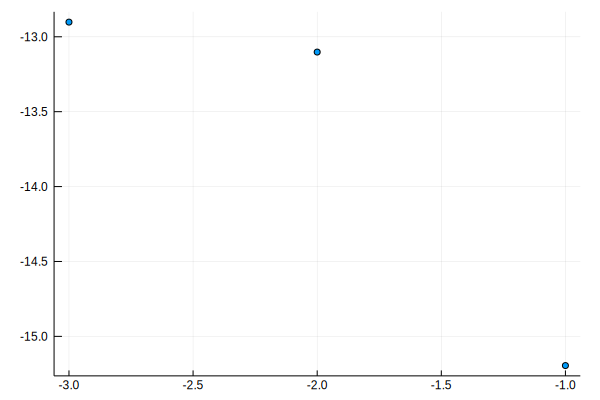

In [29]:
Y2 = abs.(num_vals2 - vals2)
scatter(log.(10,X2),log.(10,Y2),legend=false,ms=3)